In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Pandas Review

## Load `Titanic.csv`

In [2]:
titanic = pd.read_csv('titanic.csv')

## Inspect the Data


### Look at the data

In [3]:
titanic.head()

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


### Print your columns and corresponding data types

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 10 columns):
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
gender       1313 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 102.7+ KB


### Print all columns as a list

In [5]:
print('Columns:', list(titanic.columns))

Columns: ['pclass', 'survived', 'name', 'age', 'embarked', 'home.dest', 'room', 'ticket', 'boat', 'gender']


### Print the shape of your dataframe

In [6]:
print('Shape:',titanic.shape)

Shape: (1313, 10)


### Visualize the distribution of classes 

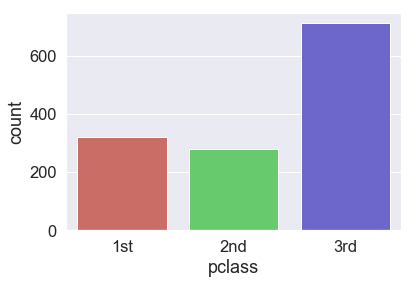

In [7]:
sns.set(font_scale=1.5)
countplt=sns.countplot(x='pclass', data=titanic, palette ='hls')
plt.show()

### Group by `pclass` and take the mean

In [26]:
titanic.groupby('pclass').mean()

,survived,age,gender
pclass,,,
1st,0.599379,39.667773,0.444099
2nd,0.425000,28.300314,0.382143
3rd,0.192686,24.519658,0.299578


### Explore unique Values in the `room` and `ticket` fields

In [72]:
print('Unique values for the \'room\' field:', titanic.room.unique())

Unique values for the 'room' field: ['2' nan '-135' '11' '3' '10' '-22' '-124' '4' '9' 'B' '6' '5' '-148' '7'
 'D' '-241' '8' '15' '-208' '7-May' 'C' '-172' '14' '-269' 'A' '13' '-62'
 '1' '-133' '-275' '-147' '-307' '-38' '-80' '-258' '-126' '-292' '-175'
 '-249' '-230' '-122' '-263' '-234' '-189' '-166' '-207' '-109' '-96'
 '-46' '-245' '-169' '-110' '-45' '-232' '12' '-174' '-97' '-18' '-130'
 '-17' '-295' '-286' '-236' '-322' '-297' '-305' '-19' '-75' '-35' '-256'
 '-149' '-283' '-165' '14/D' '-108' '-121' '-52' '-209' '14/12' '-271'
 '-43' '-15' '-101' '-287' '-81' '16' '-140' '-293' '-294' '-190' '-72'
 '-103' '-79' '-259' '-260' '-89' '-142' '-299' '-171']


In [30]:
print('Unique values for the \'ticket\' field:', titanic.ticket.unique())

Unique values for the 'ticket' field: ['24160 L221' nan '13502 L77' '17754 L224 10s 6d' '17477 L69 6s' ' '
 '17591 L50 9s 11d' '17610 L27 15s 5d' '17755 L512 6s' '11755 L39 12s'
 '17485 L56 18s 7d' '113780 L28 10s' '17582 L153 9s 3d' '17593 L56 18s 7d'
 '36973 L83 9s 6d' '111361 L57 19s 7d' '112058 Complimentary'
 '17604 L39 12s' '17613 L27 14s 5d' '17608 L262 7s 6d' '17483 L221 15s 7d'
 '17754' '17483' '17608' '17485' '112058' '17593' '112059' '230136 L39'
 '248698 L13' '27849' '28220 L32 10s' '229236 L13' '248749 L13'
 '13529 L26 5s' '230080 L26' '250647' '34218 L10 10s' '248744 L13'
 'L15 1s' '7076' '392091']


### Create a series from the `name` column in the titanic df

In [87]:
name_ser = titanic.name

### Exercise: How to bin a numeric series to 10 groups of equal size?

In [22]:
ser = titanic.age
print(ser.head())

#use cut to show how you can group into bins 
titanic['age_bin'] = pd.cut(titanic.age, bins = 3, labels =['young', 'middle age', 'old'] )


# Solution
titanic['age_quantile'] = pd.qcut(ser, q=[0, .10, .20, .3, .4, .5, .6, .7, .8, .9, 1], 
        labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th'])
titanic.head()

0    29.0000
1     2.0000
2    30.0000
3    25.0000
4     0.9167
Name: age, dtype: float64


,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,age_bin,age_quantile
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,middle age,5th
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,young,1st
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,middle age,5th
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,middle age,4th
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,young,1st


## Working with dataframes (append, merge, concentrate, reshape)
Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Step I. Split the data

### Split the data horizontally

In [23]:
#separate it out!
titanic_hor1 = titanic[:10]
titanic_hor2 = titanic[10:30]

### Split the data Vertically - get ['pclass', 'survived', 'name'] into one list and ['age', 'embarked', 'home.dest'] to another

In [24]:
#Start by trying to type this manually 
titanic[['pclass', 'name', 'age', 'home.dest', 'survived']]

# loc(start:stop:step)
titanic_vert1 = titanic.loc[:, 'pclass':'name']
titanic_vert2 = titanic.loc[:, 'age':'home.dest']

### Practice: Slice titanic data set from `pclass` to the end, skipping a column in between 

In [52]:
titanic_vert3 = titanic.loc[:, 'pclass'::2]

### Step II. Compbine the data

##### Concentrate Horizontally 

<img src="concat1.png" style="width: 400px;">

###  Combine `titanic_hor1` and `titanic_hor2` horizontally as shown in the image above

#### Use `Concat`

In [61]:
frames = [titanic_hor1,titanic_hor2]

result_concat = pd.concat(frames)

#### Use `Append`

In [58]:
result_append = titanic_hor1.append(titanic_hor2)

##### Concentrate Vertically 

<img src="concat2.png" style="width: 400px;">

### Concentrate `titanic_vert1` and `titanic_vert2` vertically 

#### Use `concat`

In [69]:
result_concat_vert = pd.concat([titanic_vert1, titanic_vert2], axis = 1)

#### Use `Merge` to combine  `titanic_hor1` and `titanic_vert1` on `name`

In [79]:
result_merge_vert  = pd.merge(titanic_hor1, titanic_vert1, on = 'name')

#### Merge `titanic_hor1` and `titanic_vert1` on `name` so all rows in `titanic_vert1` are included

In [83]:
result_merge_outer = pd.merge(titanic_hor1, titanic_vert1, on = 'name', how='outer')

#### Check if the resulted dataset has duplicated values

In [ ]:
pd.merge(titanic_hor1, titanic_vert1, on = 'name', how='outer', validate="one_to_one")

## Delete a few columns from the df

In [26]:
#use drop function

titanic_reduced = titanic.drop(columns=['age', 'pclass'], axis=1)
titanic_reduced.head()

,survived,name,embarked,home.dest,room,ticket,boat,gender,age_bin,age_quantile
0,1,"Allen, Miss Elisabeth Walton",Southampton,"St Louis, MO",B-5,24160 L221,2,female,middle age,5th
1,0,"Allison, Miss Helen Loraine",Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,young,1st
2,0,"Allison, Mr Hudson Joshua Creighton",Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,middle age,5th
3,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,middle age,4th
4,1,"Allison, Master Hudson Trevor",Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,young,1st


# Working with Categorical Data 

### Convert female to 1, male to 0 in the gender field

In [22]:
# specify what 1 stands for
titanic['gender'] = (titanic['gender']=='female').astype(int)
titanic.head()

### Replace values in the `pclass` column with a numerical scale

In [36]:
titanic['pclass_replaced'] = titanic['pclass'].replace(['1st','2nd', '3rd'],[1,2,3])
titanic.head()

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,age_bin,age_quantile,pclass_replaced
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,middle age,5th,1
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,young,1st,1
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,middle age,5th,1
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,middle age,4th,1
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,young,1st,1
